In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry


In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.50)))

In [3]:
# Imagem de exemplo

image = cv2.imread('DJI_0128.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

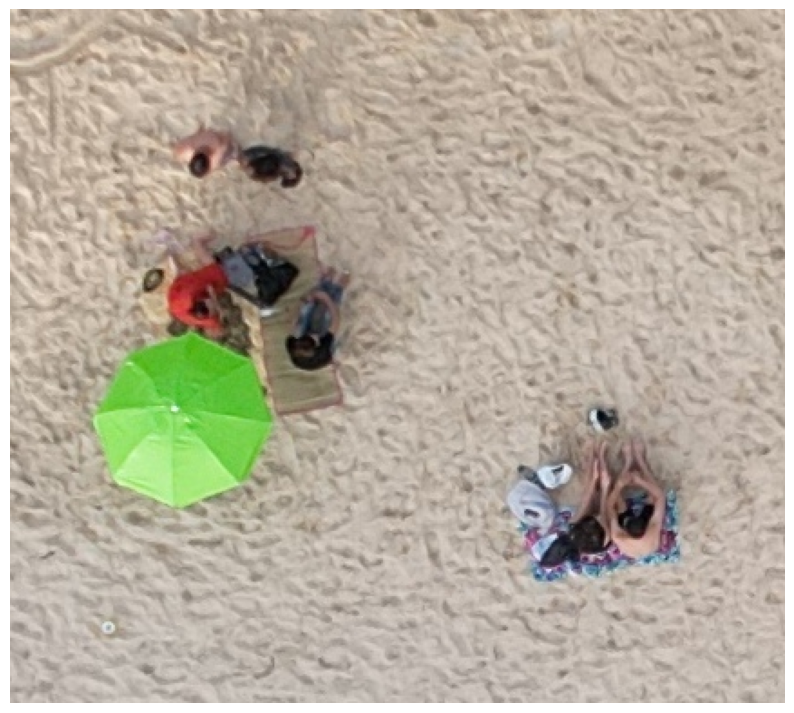

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
# modelo

sam = sam_model_registry["vit_h"](checkpoint="/Users/jac/Documents/projs/sam_vit_h_4b8939.pth")
#device = "cuda"
#sam.to(device)
mask_generator = SamAutomaticMaskGenerator(sam)


In [6]:
masks = mask_generator.generate(image )

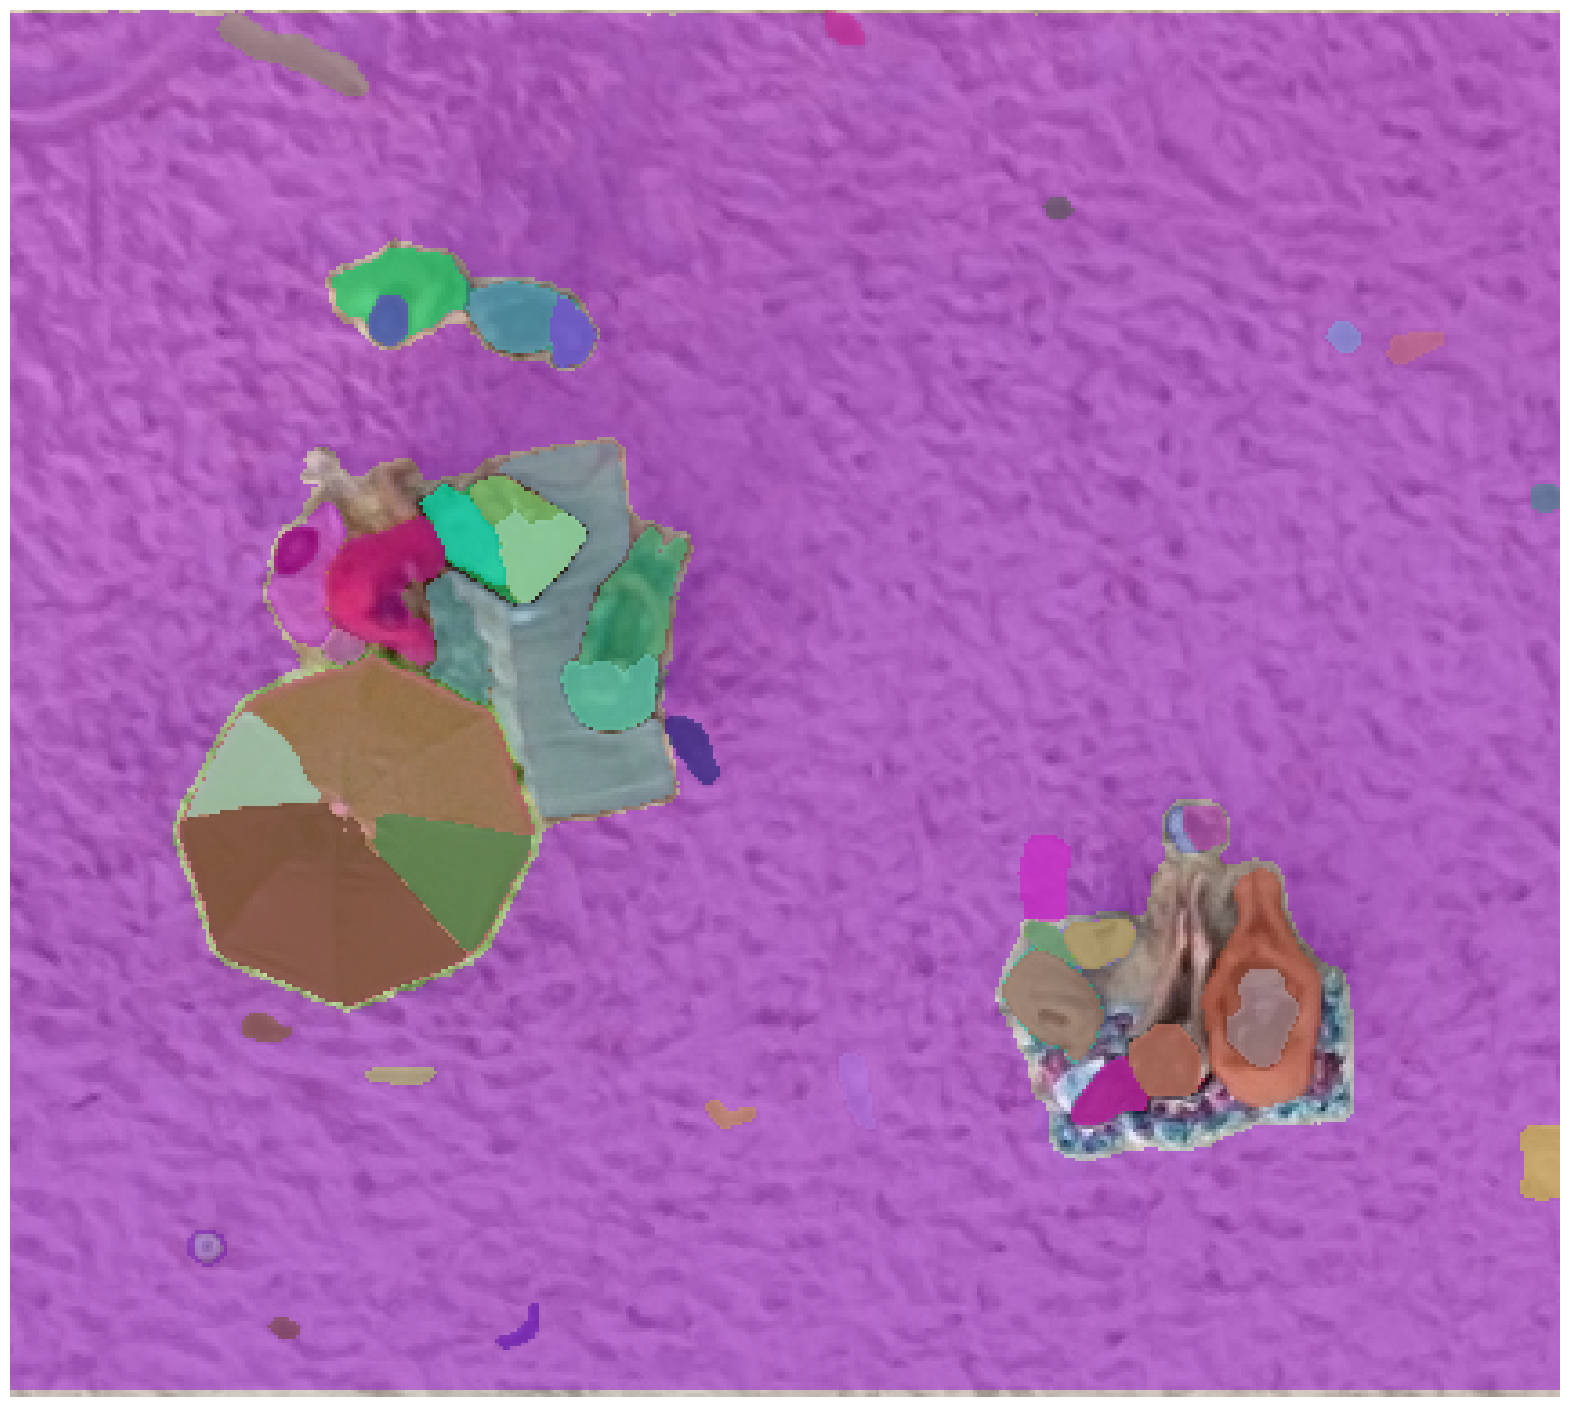

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [13]:
# save as png earch area in the image as cropped by the boulding box from each mask element detected.

for i, mask in enumerate(masks):
    x, y, w, h = mask['bbox']
    crop = image[y:y+h, x:x+w]
    cv2.imwrite(f"objetos/mask_{i}.png", crop)
